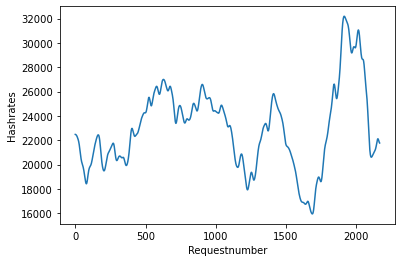

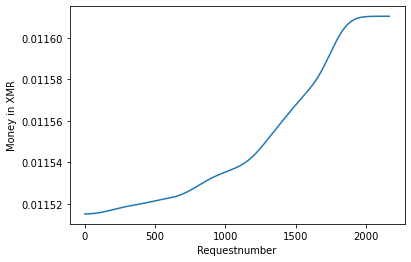

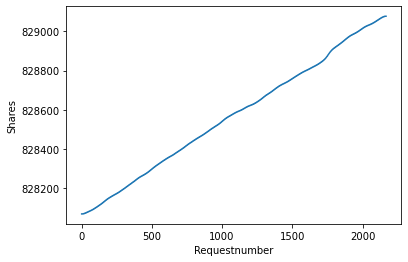

In [ ]:
import json
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import interp1d
import numpy as np
import time
from IPython.display import clear_output

np.set_printoptions(linewidth=110)

with open("data.txt", "r") as a_file:
    hashrates = []
    money = []
    shares = []
    for line in a_file:
        hashrates.append(json.loads(line.strip())["hash"])
        money.append(int(json.loads(line.strip())["amtDue"])/1000000000000)
        shares.append(json.loads(line.strip())["validShares"])
    with plt.rc_context({'figure.facecolor':'white'}):
        while True:
            hashrates_smoothed = gaussian_filter1d(hashrates, sigma=8)
            plt.plot(hashrates_smoothed)
            plt.ylabel('Hashrate')
            plt.xlabel('Requestnumber')
            plt.show()

            money_smoothed = gaussian_filter1d(money, sigma=100)
            plt.plot(money_smoothed)
            plt.ylabel('Money in XMR')
            plt.xlabel('Requestnumber')
            plt.show()

            shares_smoothed = gaussian_filter1d(shares, sigma=20)
            plt.plot(shares_smoothed)
            plt.ylabel('Shares')
            plt.xlabel('Requestnumber')
            plt.show()

            time.sleep(7)
            clear_output(wait=True)
